# 数据挖掘作业一
分析的数据集:

[GitHub Dataset](https://www.kaggle.com/datasets/nikhil25803/github-dataset?select=repository_data.csv)

[Tweet Sentiment's Impact on Stock Returns](https://www.kaggle.com/datasets/thedevastator/tweet-sentiment-s-impact-on-stock-returns?select=reduced_dataset-release.csv)


代码所在仓库：https://github.com/Carl-Li-zx/bit-data-mining-homework-0328

## 0. 数据分析要求
### 0.1 数据摘要和可视化

    数据摘要

      标称属性，给出每个可能取值的频数

      数值属性，给出5数概括及缺失值的个数

    数据可视化

      使用直方图、盒图等检查数据分布及离群点
### 0.2 数据缺失的处理

观察数据集中缺失数据，分析其缺失的原因。分别使用下列四种策略对缺失值进行处理:

    将缺失部分剔除
    用最高频率值来填补缺失值
    通过属性的相关关系来填补缺失值
    通过数据对象之间的相似性来填补缺失值

注意：在处理后完成，要对比新旧数据集的差异。

## 1. Github数据统计与摘要

### 1.1 数据摘要、标称属性与缺失值

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import time
from tqdm import tqdm
import numpy as np
from utils.summary import *
from utils.visualization import *
from utils.missing_value import *

datas = read_dataset(PATH['github'])
total_value_counts = get_counts_github(datas)
print_counts(total_value_counts)
print("\n缺失值统计:")
print_nan(total_value_counts)

(stars_count, counts): (5,382344), (6,291080), (7,222837), (8,177440), (9,143879) ...
(forks_count, counts): (0,443140), (1,385729), (2,311002), (3,245666), (4,192695) ...
(watchers, counts): (2,652482), (1,574212), (3,421492), (4,262946), (5,175548) ...
(pull_requests, counts): (0,1418235), (1,344685), (2,172735), (3,109360), (4,79058) ...
(primary_language, counts): (JavaScript,451954), (Python,451473), (NAN,218573), (Java,202394), (C++,150066) ...
(languages_used, counts): (JavaScript,828559), (Python,686604), (HTML,594732), (Shell,580840), (CSS,464495) ...
(commit_count, counts): (2.0,102748), (3.0,102074), (4.0,95544), (5.0,89627), (6.0,82091) ...
(created_at, counts): (2020-04,36315), (2020-05,35971), (2020-03,33343), (2020-06,32041), (2020-07,31954) ...
(licence, counts): (NAN,1378200), (MIT License,784251), (Apache License 2.0,210698), (Other,167987), (GNU General Public License v3.0,159443) ...

缺失值统计:
languages_used, 221984
primary_language, 218573
licence, 1378200


这里我展示了Github数据集的标称属性，由于数据量较大，只显示最多的前五组。例如(stars_count,counts): (5,382344),(6,291080),(7,222837),(8,177440),(9,143879)，表明数据集中有5个stars的仓库的数量最多，一共有382344个，其次是6个starts的。

所有数据里，只有languages used、primary language、licence存在缺失值nan，推测原因可能是存在无法识别的语言类型、仓库作者没有填写有关信息、代码本身是独家版权，没有许可证以及数据集=本身存在错误。

### 1.2 数值数据的五数概括

In [2]:
limit = summary(datas)

stars_count: minimum=2, q1=7.0, median=12.0, q3=30.0, maximum=359805
forks_count: minimum=0, q1=1.0, median=4.0, q3=11.0, maximum=242208
watchers: minimum=0, q1=2.0, median=3.0, q3=6.0, maximum=9544
pull_requests: minimum=0, q1=0.0, median=1.0, q3=6.0, maximum=301585
commit_count: minimum=1.0, q1=9.0, median=27.0, q3=89.0, maximum=4314502.0


从五数概括可以发现，数据的最大值普遍远大于上分位数，数据中普遍存在数值较大的离群点。

### 1.3 Github原始数据摘要可视化

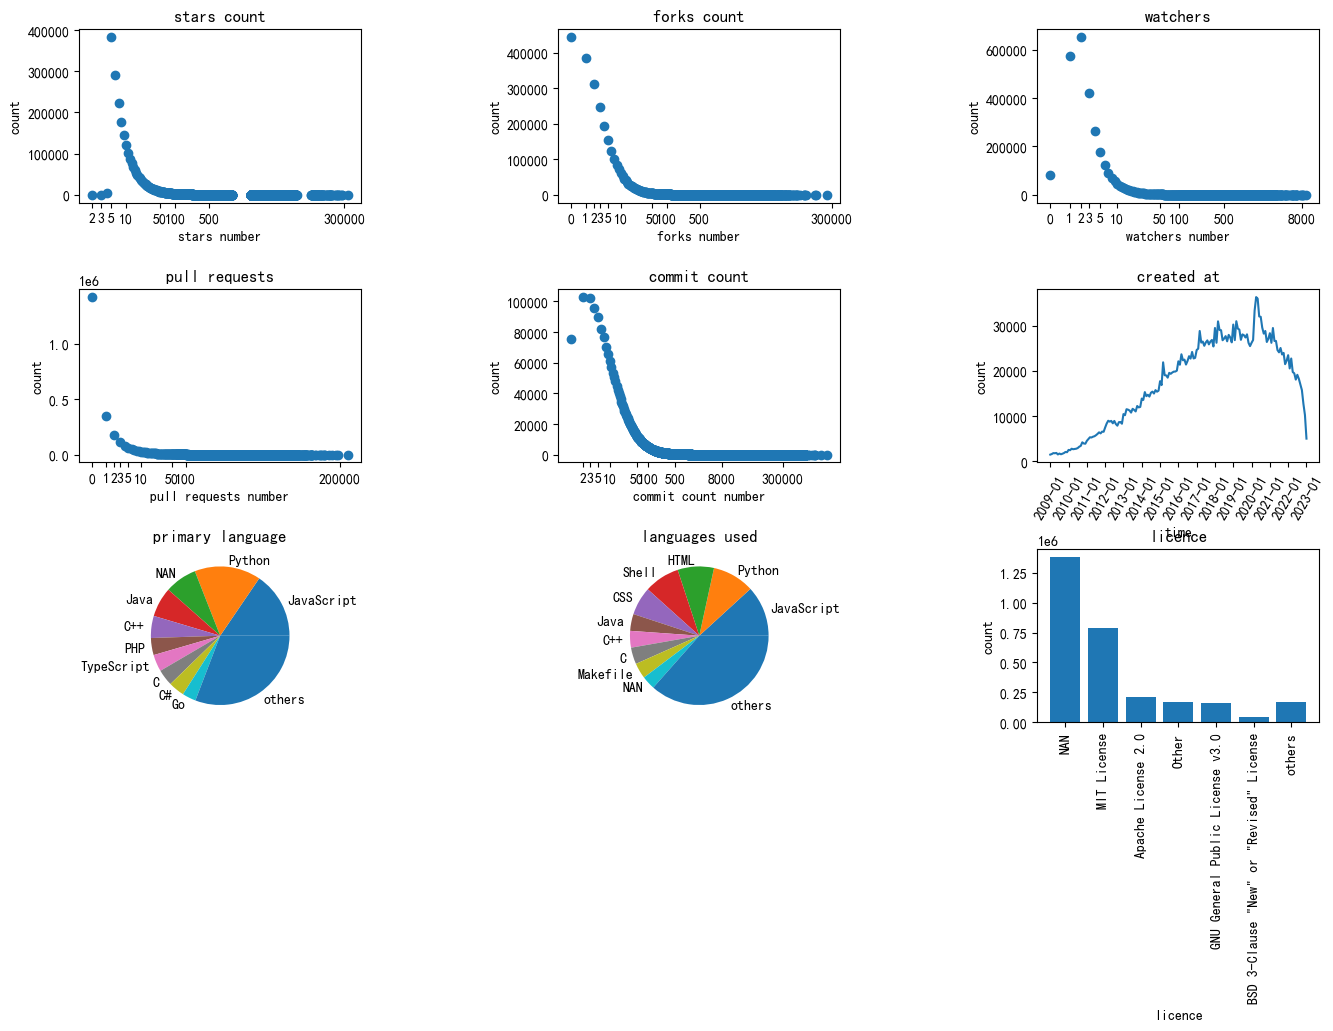

In [3]:
draw_raw(total_value_counts)

stars,forks,watchers,pull request,commit count的数据分布都属于长尾分布，在绘制图表时，将横坐标取真实值的对数进行绘制。注意，图中的横坐标的标注值仍然是真实值。

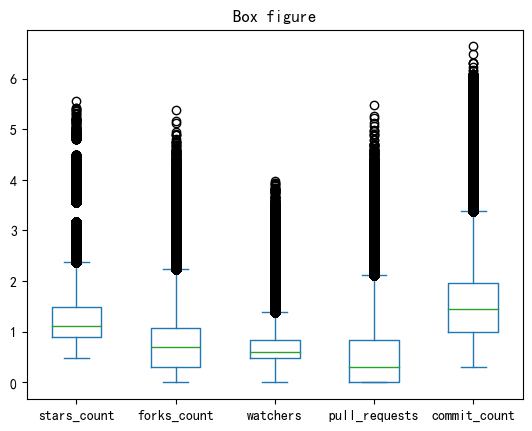

In [4]:
bg=BoxGithub(datas)

绘制了数值特征的箱型图，其中纵坐标的值$y_{\text{new}}$与原始值$y$的关系为$y_{\text{new}}=\log_{10}y$。
这一做法的动机是，离群点的值过大，使用原始的$y$会导致绘图的表现力较差

### 1.4 Github数据集离群点去除与可视化

stars_count: minimum=2, q1=6.0, median=9.0, q3=17.0, maximum=64
forks_count: minimum=0, q1=1.0, median=3.0, q3=6.0, maximum=25
watchers: minimum=0, q1=1.0, median=2.0, q3=4.0, maximum=11
pull_requests: minimum=0, q1=0.0, median=0.0, q3=1.0, maximum=14
commit_count: minimum=1.0, q1=6.0, median=16.0, q3=40.0, maximum=208.0


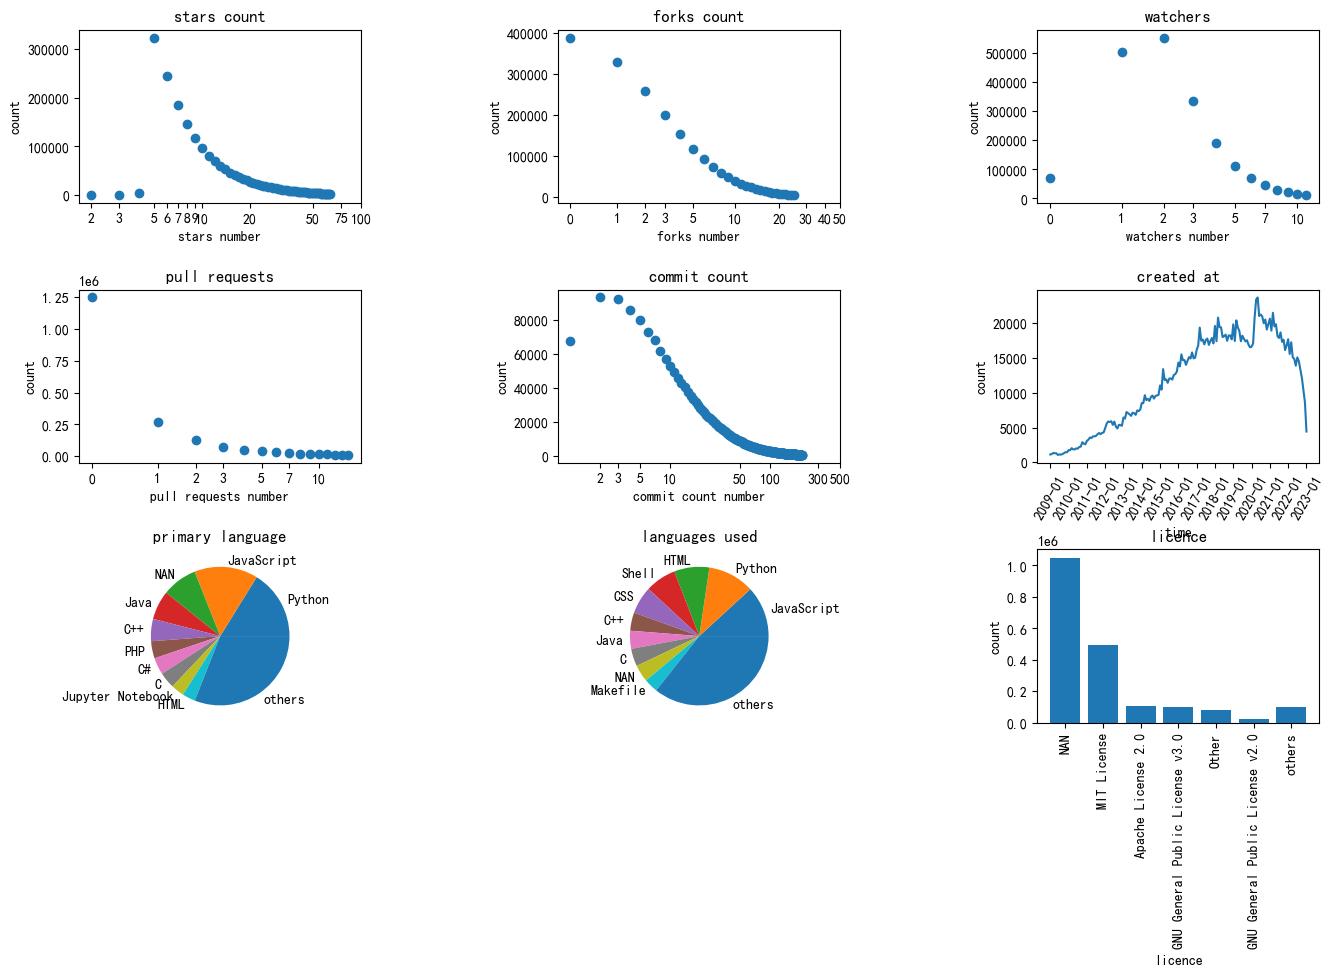

In [5]:
datas = drop_outliers(datas, limit)
_ = summary(datas)
total_value_counts = get_counts_github(datas)
draw_without_outliers(total_value_counts)

去除离群点后，stars,forks,watchers,pull request,commit count的长尾分布情况有所减轻，对于primary language、language used、licence变化不大。

### 1.5 缺失值的处理
缺失值只存在于languages_used和primary_language这两个属性里，类型为字符串。我使用去除离群点后的数据，进行缺失值处理。

#### 1.5.1 直接去除缺失值所在的行

In [6]:
dd = drop_row(datas)
print(len(datas))
print(len(dd))
_ = summary(dd)

1956993
860551
stars_count: minimum=3, q1=6.0, median=10.0, q3=18.0, maximum=64
forks_count: minimum=0, q1=1.0, median=3.0, q3=6.0, maximum=25
watchers: minimum=0, q1=2.0, median=2.0, q3=4.0, maximum=11
pull_requests: minimum=0, q1=0.0, median=0.0, q3=2.0, maximum=14
commit_count: minimum=1.0, q1=9.0, median=22.0, q3=51.0, maximum=208.0


直接去除缺失值后，数据量由1956993下降到860551，只有commit_count的五数概括有较大的变化，说明缺失值载数据集中分布是均匀的。

#### 1.5.2 用最高频率值来填补缺失值

In [7]:
fd = filling_row(datas)
_ = summary(fd)

stars_count: minimum=2, q1=6.0, median=9.0, q3=17.0, maximum=64
forks_count: minimum=0, q1=1.0, median=3.0, q3=6.0, maximum=25
watchers: minimum=0, q1=1.0, median=2.0, q3=4.0, maximum=11
pull_requests: minimum=0, q1=0.0, median=0.0, q3=1.0, maximum=14
commit_count: minimum=1.0, q1=6.0, median=16.0, q3=40.0, maximum=208.0


用最高频率值来填补缺失值后，五数概括变化较小。

#### 1.5.3 通过属性的相关关系来填补缺失值
由于language used和primary language通常是同时缺失，而这两项和其他属性相关关系不大，因此无法通过这种方式填充。

#### 1.5.4 通过数据对象之间的相似性来填补缺失值
我使用余弦相似度来判断每一组数据的数值部分的相似度，将最相似的一组数据用于填充缺失组的参考，考虑到算法的复杂度和执行时间，我设置了$\epsilon=0.1$当相似度大于等于$1-\epsilon$时，则对于当前数据对象停止循环并进行缺失填充，并且搜索范围限制在当前数据对象的前后1000个数据内。

In [8]:
fs = similar_filling_github(datas, dd)
_ = summary(fs)

100%|██████████████████████████████████████████████████████████████████████| 1956993/1956993 [18:57<00:00, 1720.03it/s]


stars_count: minimum=2, q1=6.0, median=9.0, q3=17.0, maximum=64
forks_count: minimum=0, q1=1.0, median=3.0, q3=6.0, maximum=25
watchers: minimum=0, q1=1.0, median=2.0, q3=4.0, maximum=11
pull_requests: minimum=0, q1=0.0, median=0.0, q3=1.0, maximum=14
commit_count: minimum=1.0, q1=6.0, median=16.0, q3=40.0, maximum=208.0


## 2. 推特情绪对股票回报的影响

### 2.1 数据预处理与缺失值填充
由于数据集噪声较大且格式较混乱，在第一步先执行预处理，并且填充缺失值。

在这一步根据观察，数据集并没有缺失数据，数据集某一行的缺失值其实可以用其后面几行填充，其原因可能是由于文本数据存在换行符导致的格式混乱。

填充方法与填充后的效果如下图所示
![STOCK](./pic/01.png)

In [9]:
from utils.summary import *
from utils.visualization import *
from utils.missing_value import *
import statsmodels.api as sm

datas = read_dataset(PATH['stock'])
datas = preprocess_stock(datas)

D:\projects\Data-Mining-Homework\utils\summary.py:15: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(path)


#### 2.2 数据摘要
给出了STOCK，LSTM_POLARITY，TEXTBLOB_POLARITY的标称属性(每个取值的频数)，由于成交量、股价收益损失和波动率是连续的数值,因此给出了五数概括。

In [10]:
from utils.summary import *
total_value_counts = get_counts_stock(datas)
limit = summary(datas)

(STOCK, counts): (Facebook,121285), (Ford,93958), (Nike,70224), (Next,66868), (Google,63675), (Apple,63543), (Amazon,51902), (Netflix,51040), (Disney,37763), (eBay,26144), (Starbucks,15258), (Walmart,14511), (Reuters,13464), (Samsung,12071), (Microsoft,11356), (Intel,10931), (CBS,10241), (McDonald's,8192), (Sony,7963), (adidas,7343), (PayPal,6991), (BMW,6436), (Toyota,5615), (HP,3944), (Honda,3745), (Ryanair,3466), (BP,3444), (IBM,3350), (UPS,3278), (Visa,3042), (Shell,3032), (Yahoo,2933), (Nissan,2865), (Kroger,2624), (Oracle,2615), (Tesco,2609), (Verizon,2557), (Pepsi,2519), (Costco,2511), (Audi,2505), (Boeing,2504), (Cisco,2146), (Adobe,1936), (SAP,1836), (Comcast,1629), (Burberry,1446), (TMobile,1415), (AT&T,1292), (FedEx,1249), (HSBC,1167), (Hyundai,1073), (ASOS,936), (Vodafone,894), (Exxon,888), (Nestle,811), (Bayer,783), (Gillette,773), (Mastercard,733), (JPMorgan,687), (Heineken,672), (Pfizer,654), (Chevron,557), (H&M,551), (Siemens,506), (Citigroup,489), (CocaCola,451), (TripA

#### 2.3 可视化
可视化部分绘制了成交量、股价和波动率的箱型图。

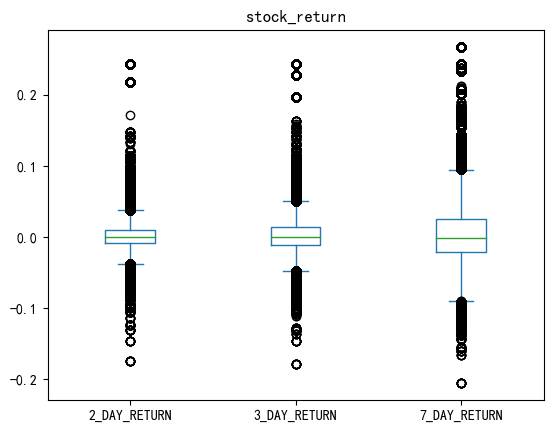

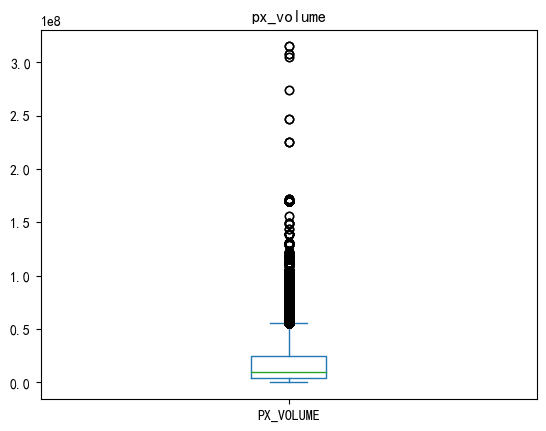

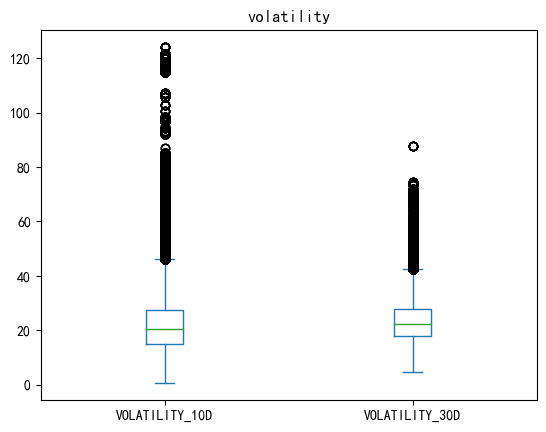

In [11]:
BoxStock(datas)